In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from glob import glob
from sklearn.manifold import TSNE
import random

SEED = 0
random.seed(SEED)
np.random.seed(SEED)

%matplotlib inline

### 学習後のモデルから取得した埋め込み行列をt-SNEで次元削減

/Users/tokkuman/.pyenv/versions/3.8.3/envs/py3.8-base/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/tokkuman/.pyenv/versions/3.8.3/envs/py3.8-base/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


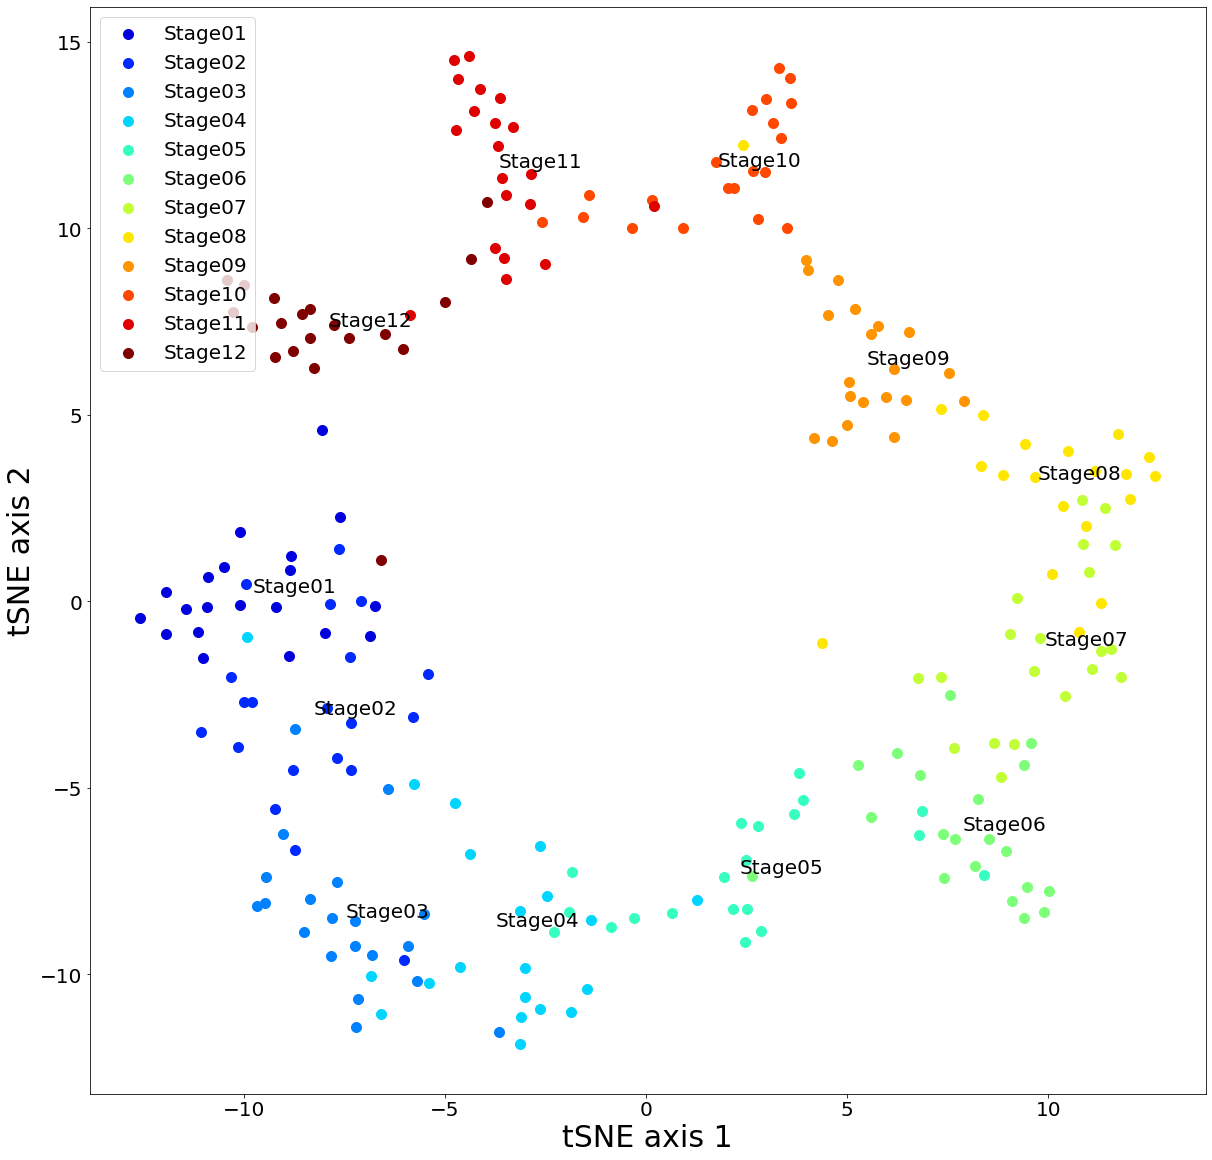

In [2]:
root = '/Users/tokkuman/git-tokkuman/seminiferous_tubule_stage_classification/results/cls12/test_resnet_20211208_145130/'
path_feat = np.sort(glob(os.path.join(root, 'features', '*.npy')))

feat_list, label_list = [], []
for p in path_feat:
    feat_list.append(np.load(p))
    label_list.append(int(p[p.rfind('_')+1:p.rfind('-')]))
        
labelu = np.unique(label_list)
    
tsne = TSNE(n_components=2, random_state=SEED, perplexity=30, n_iter=1000)
embedded = tsne.fit_transform(feat_list)

cm = plt.cm.get_cmap("jet")
plt.figure(figsize=(20, 20))
for labu in labelu:
    embx, emby = [], []
    for emb, lab in zip(embedded, label_list):
        if labu == lab:
            embx.append(emb[0])
            emby.append(emb[1])
    plt.scatter(embx, emby, label='Stage{0:02d}'.format(labu), color=cm(labu/len(labelu)), s=100)
    embx_mean = np.mean(embx)
    emby_mean = np.mean(emby)
    plt.annotate('Stage{0:02d}'.format(labu), (embx_mean, emby_mean), size=20)
plt.xlabel('tSNE axis 1', size=30)
plt.ylabel('tSNE axis 2', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(fontsize = 20, loc=2)

# plt.savefig(os.path.join(root, 'figs', 'tSNE_trained_resnet.pdf'))

### 学習済み ResNet (ImageNet) に全データセットを通して取得した埋め込み行列をt-SNEで次元削減

/Users/tokkuman/.pyenv/versions/3.8.3/envs/py3.8-base/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/tokkuman/.pyenv/versions/3.8.3/envs/py3.8-base/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


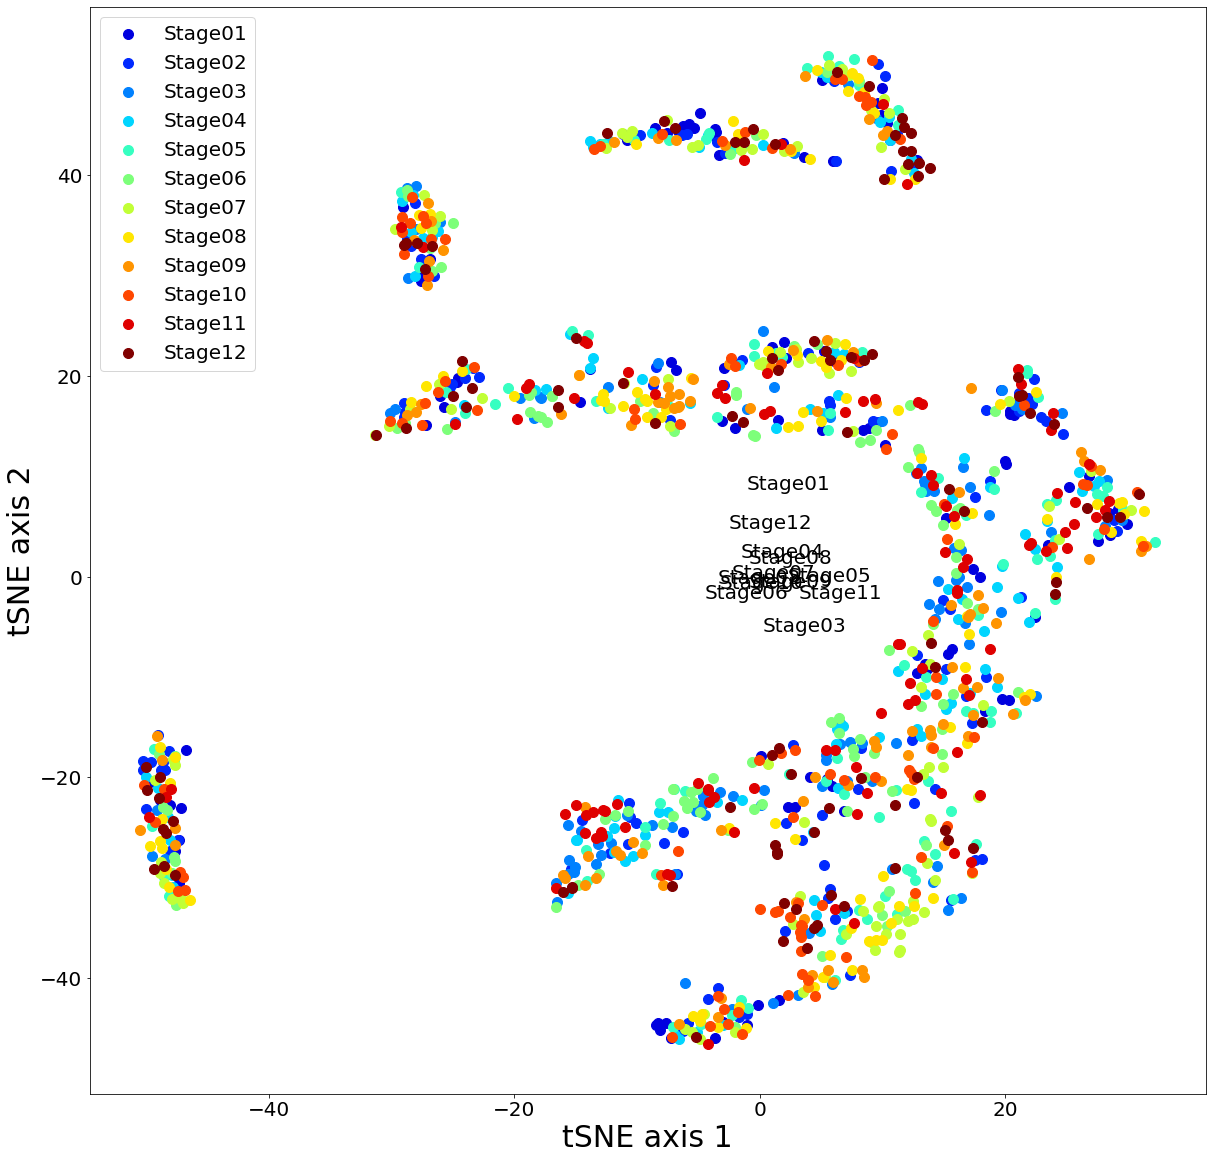

In [3]:
root = '/Users/tokkuman/git-tokkuman/seminiferous_tubule_stage_classification/results/cls12/inference_ResNet_ImageNet/'
path_feat = np.sort(glob(os.path.join(root, 'features', '*.npy')))
os.makedirs(os.path.join(root, 'figs'), exist_ok=True)

feat_list, label_list = [], []
for p in path_feat:
    feat_list.append(np.load(p))
    label_list.append(int(p[p.rfind('_')+1:p.rfind('-')]))

labelu = np.unique(label_list)

tsne = TSNE(n_components=2, random_state=SEED, perplexity=30, n_iter=1000)
embedded = tsne.fit_transform(feat_list)

cm = plt.cm.get_cmap("jet")
plt.figure(figsize=(20, 20))
for labu in labelu:
    embx, emby = [], []
    for emb, lab in zip(embedded, label_list):
        if labu == lab:
            embx.append(emb[0])
            emby.append(emb[1])
    plt.scatter(embx, emby, label='Stage{0:02d}'.format(labu), color=cm(labu/len(labelu)), s=100)
    embx_mean = np.mean(embx)
    emby_mean = np.mean(emby)
    plt.annotate('Stage{0:02d}'.format(labu), (embx_mean, emby_mean), size=20)
plt.xlabel('tSNE axis 1', size=30)
plt.ylabel('tSNE axis 2', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(fontsize = 20, loc=2)

# plt.savefig(os.path.join(root, 'figs', 'tSNE_avgpool_label_stage.pdf'))

/Users/tokkuman/.pyenv/versions/3.8.3/envs/py3.8-base/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/tokkuman/.pyenv/versions/3.8.3/envs/py3.8-base/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


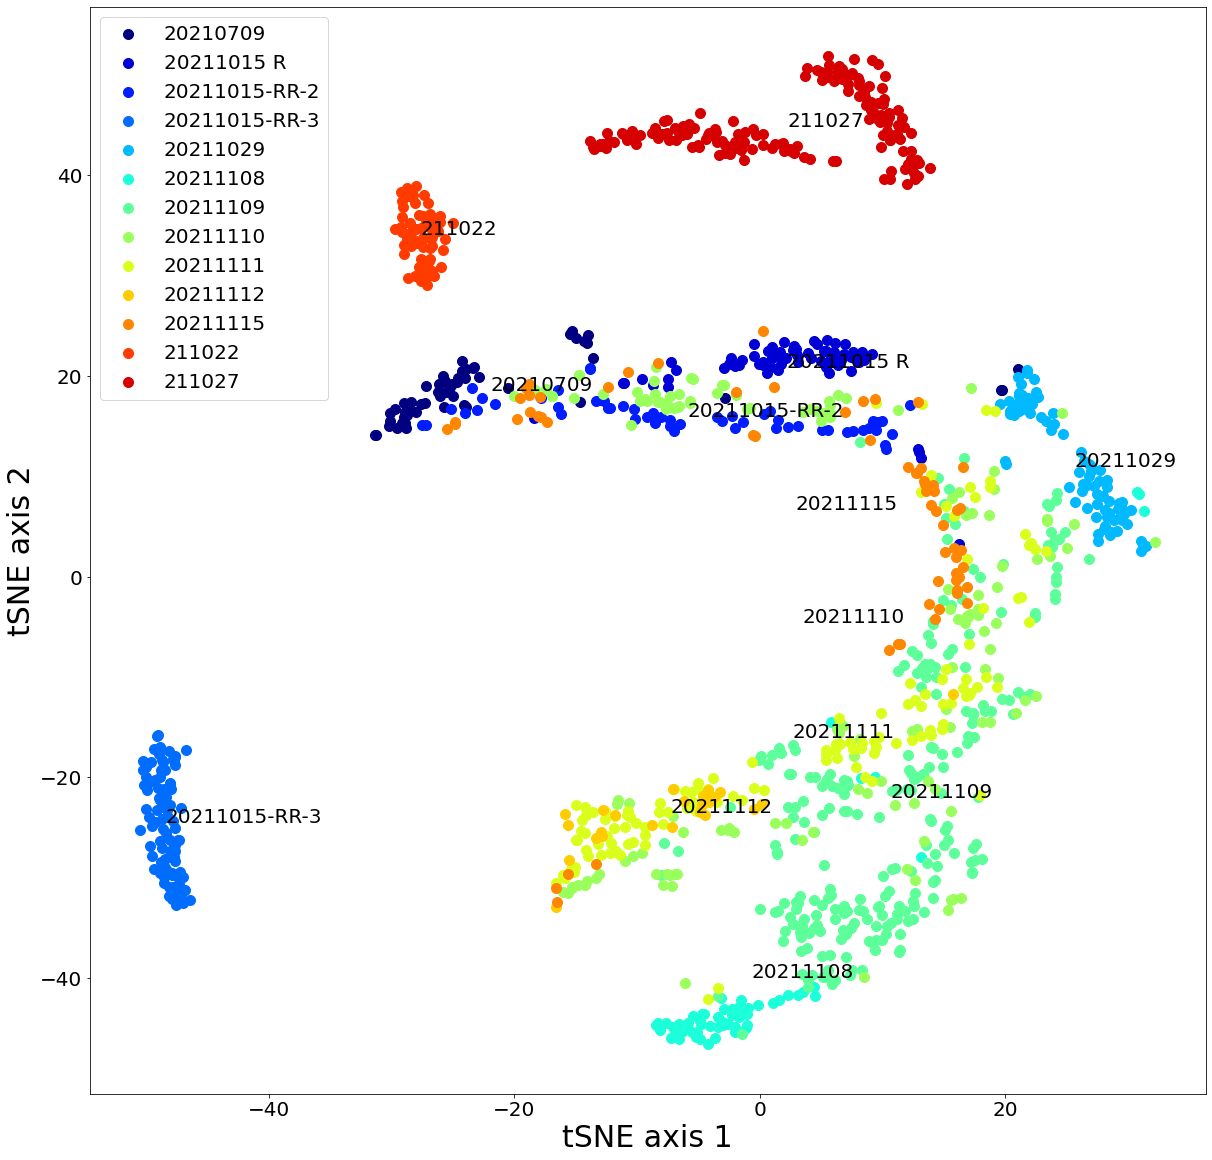

In [4]:
root = '/Users/tokkuman/git-tokkuman/seminiferous_tubule_stage_classification/results/cls12/inference_ResNet_ImageNet/'
path_feat = np.sort(glob(os.path.join(root, 'features', '*.npy')))
os.makedirs(os.path.join(root, 'figs'), exist_ok=True)

feat_list, label_list = [], []
for p in path_feat:
    feat_list.append(np.load(p))
    p = os.path.basename(p)
    label_list.append(p[:p.find('_')])
        
labelu = np.unique(label_list)
    
tsne = TSNE(n_components=2, random_state=SEED, perplexity=30, n_iter=1000)
embedded = tsne.fit_transform(feat_list)

cm = plt.cm.get_cmap("jet")
plt.figure(figsize=(20, 20))
for i, labu in enumerate(labelu):
    embx, emby = [], []
    for emb, lab in zip(embedded, label_list):
        if labu == lab:
            embx.append(emb[0])
            emby.append(emb[1])
    plt.scatter(embx, emby, label='{}'.format(labu), color=cm(i/len(labelu)), s=100)
    embx_mean = np.mean(embx)
    emby_mean = np.mean(emby)
    plt.annotate('{}'.format(labu), (embx_mean, emby_mean), size=20)
plt.xlabel('tSNE axis 1', size=30)
plt.ylabel('tSNE axis 2', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(fontsize = 20, loc=2)

# plt.savefig(os.path.join(root, 'figs', 'tSNE_avgpool_label_day.pdf'))

### 上記方法でマウス個体ごとにラベリング

In [5]:
path_raw_dataset = '/Users/tokkuman/thesis/Ikawa/精細管ステージング写真_遠藤_20211103/'

# Sample list.xlsx の　Samle name
# 1-10 はそれぞれ別個体
# 同一個体は {11, 16, 26}, {12, 17, 18, 19}, {13, 20}, {14, 21, 22, 23, 24}, {15, 25}
# 全15個体

label_list_each_mouse = {
    1: ['20210709'],
    2: ['20211015-RR-2'],
    3: ['20211015-RR-3'],
    4: ['20211015 R'],
    5: ['211022'],
    6: ['211027'],
    7: ['211027_z'],
    8: ['20211029'],
    9: ['20211108_a'],
    10: ['20211109_a'],
    11: ['20211109_b', '20211110_d', '20211115_d'],
    12: ['20211109_c', '20211110_e', '20211111_a', '20211111_b'],
    13: ['20211110_a', '20211111_c'],
    14: ['20211110_b', '20211111_d', '20211112_a', '20211115_a', '20211115_b'],
    15: ['20211110_c', '20211115_c']
}


/Users/tokkuman/.pyenv/versions/3.8.3/envs/py3.8-base/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/tokkuman/.pyenv/versions/3.8.3/envs/py3.8-base/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


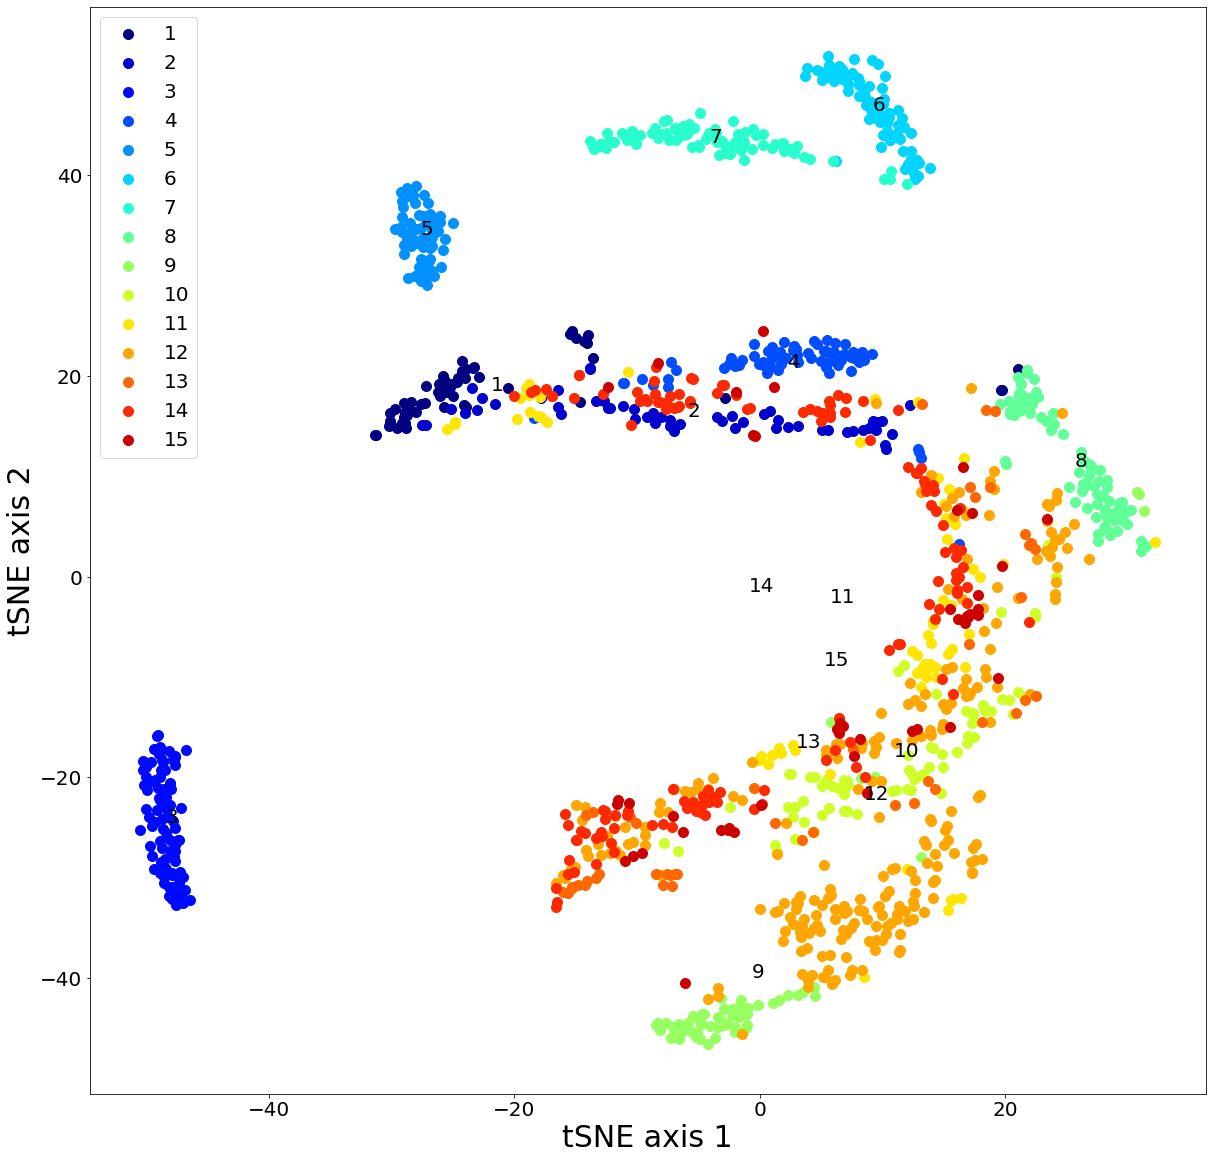

In [6]:
root = '/Users/tokkuman/git-tokkuman/seminiferous_tubule_stage_classification/results/cls12/inference_ResNet_ImageNet/'
path_feat = np.sort(glob(os.path.join(root, 'features', '*.npy')))
os.makedirs(os.path.join(root, 'figs'), exist_ok=True)

feat_list, label_list = [], []
for p in path_feat:
    feat_list.append(np.load(p))
    p = os.path.basename(p)
    label_list.append(p[:p.rfind('_')])
        
labelu = np.unique(label_list)
    
tsne = TSNE(n_components=2, random_state=SEED, perplexity=30, n_iter=1000)
embedded = tsne.fit_transform(feat_list)

cm = plt.cm.get_cmap("jet")
plt.figure(figsize=(20, 20))
for i in range(len(label_list_each_mouse)):
    embx, emby = [], []
    for emb, lab in zip(embedded, label_list):
        if lab in label_list_each_mouse[i+1]:
            embx.append(emb[0])
            emby.append(emb[1])
    plt.scatter(embx, emby, label='{}'.format(i+1), color=cm(i/len(label_list_each_mouse)), s=100)
    embx_mean = np.mean(embx)
    emby_mean = np.mean(emby)
    plt.annotate('{}'.format(i+1), (embx_mean, emby_mean), size=20)
plt.xlabel('tSNE axis 1', size=30)
plt.ylabel('tSNE axis 2', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(fontsize = 20, loc=2)

plt.savefig(os.path.join(root, 'figs', 'tSNE_avgpool_label_each_mouse.pdf'))
plt.savefig(os.path.join(root, 'figs', 'tSNE_avgpool_label_each_mouse.png'))